<a href="https://colab.research.google.com/github/iamviji/project/blob/master/Final/KerasOneHot_BPSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy
import time
import tensorflow as tf


from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization


input_message_length = 1
encoder_output_length = 0
channel_size = 1
NUM_OF_INPUT_MESSAGE = 1000
SNR_STEP_SIZE = .5

SNR_BEGIN = 0
SNR_END = 10

bler_per_iter_uncoded_commpy_psk_2 = [0.521, 0.473, 0.436, 0.37,  0.304, 0.259, 0.187, 0.138, 0.098, 0.098, 0.052, 0.028, 0.012, 0.011, 0.009, 0.002, 0.0,  0.001, 0.,    0.0]
bler_per_iter_uncoded_itpp_psk_2 = [0.518, 0.478, 0.415, 0.355, 0.305, 0.227, 0.177, 0.149, 0.11,  0.075, 0.055, 0.023, 0.014, 0.014, 0.015, 0.001, 0.003, 0.001, 0.,    0. ]
bler_per_iter_uncoded_commpy_psk_4 = [0.815, 0.793, 0.75,  0.714, 0.64,  0.639, 0.526, 0.49,  0.433, 0.371, 0.335, 0.236, 0.204, 0.154, 0.129, 0.08,  0.063, 0.046, 0.023, 0.018]
bler_per_iter_uncoded_itpp_psk_4 = [0.814, 0.767, 0.729, 0.702, 0.66,  0.616, 0.563, 0.511, 0.442, 0.4,   0.294, 0.277, 0.228, 0.17,  0.114, 0.087, 0.05,  0.037, 0.022, 0.017]
bler_per_iter_ldpc_itpp_psk_4 = [0.584, 0.488, 0.404, 0.332, 0.218, 0.151, 0.097, 0.058, 0.041, 0.024, 0.007, 0.004, 0.002, 0.001, 0.001, 0.,    0.,    0.,    0.,    0.,   ]
bler_per_iter_ham_itpp_psk_4 = [0.51, 0.479, 0.419, 0.333, 0.313, 0.247, 0.212, 0.132, 0.114, 0.093, 0.042, 0.027, 0.024, 0.016, 0.006, 0.005, 0.003, 0.002, 0.,    0.  ]
bler_per_iter_uncoded_itpp_psk_8 = [0.921, 0.917, 0.912, 0.867, 0.86,  0.857, 0.826, 0.808, 0.77,  0.737, 0.704, 0.657, 0.608, 0.6,   0.547, 0.487, 0.426, 0.361, 0.323, 0.293]
bler_per_iter_uncoded_commpy_psk_8 = [0.923, 0.912, 0.891, 0.888, 0.874, 0.851, 0.804, 0.779, 0.758, 0.736, 0.715, 0.643, 0.614, 0.557, 0.542, 0.503, 0.431, 0.386, 0.331, 0.289]

ber_per_iter_uncoded_itpp_psk_2 = [0.07933333, 0.067, 0.058, 0.04811111, 0.039, 0.02911111, 0.02211111, 0.01833333, 0.01266667, 0.00866667, 0.00622222, 0.00255556, 0.00166667, 0.00155556, 0.00166667, 0.00011111, 0.00033333, 0.00011111, 0., 0.]
ber_per_iter_uncoded_commpy_psk_2 = [0.07955556, 0.07055556, 0.05344444, 0.04477778, 0.03644444, 0.02888889, 0.02055556, 0.01955556, 0.01033333, 0.00855556, 0.00522222, 0.004, 0.00188889, 0.00155556, 0.00055556, 0.00066667, 0.00022222, 0.00011111, 0., 0.]
ber_per_iter_uncoded_itpp_psk_4 = [0.1559, 0.1421, 0.1248, 0.1137, 0.1031, 0.0924, 0.0802, 0.0684, 0.055,  0.0499, 0.0348, 0.0336, 0.0257, 0.0185, 0.0121, 0.0092, 0.0054, 0.0037, 0.0022, 0.0017]
ber_per_iter_uncoded_commpy_psk_4 = [0.2137, 0.1943, 0.1773, 0.1624, 0.1473, 0.1355, 0.1105, 0.0984, 0.0873, 0.0686, 0.0573, 0.0454, 0.0356, 0.024,  0.0214, 0.0142, 0.0111, 0.0055, 0.0038, 0.002]
ber_per_iter_uncoded_itpp_psk_8 = [0.24566667, 0.23411111, 0.21455556, 0.19888889, 0.188, 0.184, 0.16355556, 0.15655556, 0.13777778, 0.12966667, 0.115, 0.10622222, 0.09211111, 0.088, 0.07622222, 0.06855556, 0.05677778, 0.04755556, 0.04188889, 0.03577778]
ber_per_iter_uncoded_commpy_psk_8 = [0.32577778, 0.31533333, 0.30455556, 0.29644444, 0.27955556, 0.266, 0.24677778, 0.23411111, 0.22088889, 0.209,      0.19577778, 0.17544444, 0.15844444, 0.13966667, 0.13533333, 0.12077778, 0.10211111, 0.09066667, 0.07544444, 0.06355556]
ber_per_iter_ldpc_itpp_psk_4 = [1.25444444e-01, 1.19111111e-01, 9.48888889e-02, 7.54444444e-02, 5.50000000e-02, 3.86666667e-02, 2.51111111e-02, 1.53333333e-02, 1.04444444e-02, 1.22222222e-03, 2.88888889e-03, 0.00000000e+00, 1.11111111e-04, 3.33333333e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]


import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=0,stop = 10.5, step = .5)
PSK_2_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
PSK_4_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))


def Snr2Sigma(snr):
  sigma = 10 ** (- snr / 20)
  return sigma


def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff



In [83]:
def conv_to_binary_from_decimal (decimal,input_message_size, input_message_length):
  binary = numpy.random.randint(1, size=(input_message_size,input_message_length))
  for i in range (input_message_size):
    bin = [int(x) for x in list('{0:0b}'.format(decimal[0][i]))]
    #print(bin)
    for j in range (len(bin)):
      offset = input_message_length - len(bin)
      #print ("x",offset)
      binary [i][j+offset] = bin [j]
  return binary

def GetBerBler (input_message_binary1, input_message_binary2):
  diff = abs(input_message_binary1 - input_message_binary2)
  field_sum = numpy.sum (diff, axis=1)
  field_sum = numpy.reshape (field_sum, (-1,1))
  ber = numpy.sum(field_sum)/(input_message_binary1.shape[0]*input_message_binary1.shape[1])
  field_non_zero_count = numpy.count_nonzero(field_sum != 0, axis=1)
  bler = numpy.sum(field_non_zero_count)/field_non_zero_count.shape[0]
  return ber, bler

def get_onehot_ber_bler_of_model (snr_list, encoder, decoder, input_onehot, input_binary, num_of_input_msg, input_message_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_onehot)
  for snr in snr_list:
    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    for i in range (num_of_input_msg):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])
    decoded_message = decoder.predict(noised_message)
    decoded_message_decimal = []
    decoded_message_decimal.append(numpy.argmax(decoded_message, axis=1))
    decoded_message_binary = conv_to_binary_from_decimal (decoded_message_decimal, num_of_input_msg,  input_message_length)
    ber,bler = GetBerBler (input_binary, decoded_message_binary)
    print('SNR: {:04.3f}:-> BLER: {:03.3f} BER: {:03.3f}'.format(snr,bler,ber))
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

In [84]:

snr_std = 7.0

input_message_x = Input(shape=(2**input_message_length,))
# "encoded" is the encoded representation of the input
#enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer2 = Dense(2*channel_size, activation='tanh')(input_message_x)
enc_layer3 =  enc_layer2 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer2)))
encoder = Model(input_message_x, enc_layer3)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
#dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(2**input_message_length, activation="softmax")(encoded_input)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))


print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 2)            6           input_11[0][0]                   
__________________________________________________________________________________________________
tf.math.square_5 (TFOpLambda)   (None, 2)            0           dense_10[0][0]                   
__________________________________________________________________________________________________
tf.math.reduce_mean_5 (TFOpLamb ()                   0           tf.math.square_5[0][0]           
___________________________________________________________________________________________

In [85]:
training_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*10))
training_input_message_binary = conv_to_binary_from_decimal (training_input_message,NUM_OF_INPUT_MESSAGE*10,  input_message_length)
training_input_message_one_hot = numpy.zeros((training_input_message.size, 2**input_message_length))
training_input_message_one_hot[numpy.arange(training_input_message.size),training_input_message] = 1
print(training_input_message_one_hot)
print (training_input_message_one_hot.shape)
print (training_input_message.shape)

test_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*2))
test_input_message_binary = conv_to_binary_from_decimal (test_input_message,NUM_OF_INPUT_MESSAGE*2,  input_message_length)
test_input_message_one_hot = numpy.zeros((test_input_message.size, 2**input_message_length))
test_input_message_one_hot[numpy.arange(test_input_message.size),test_input_message] = 1
print(test_input_message_one_hot)
print (test_input_message_one_hot.shape)
print (test_input_message.shape)

training_input_message_label = training_input_message.reshape(training_input_message.shape[1])
print (training_input_message)
print (training_input_message_label)
test_input_message_label = test_input_message.reshape(test_input_message.shape[1])
print (test_input_message)
print (test_input_message_label)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
(10000, 2)
(1, 10000)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
(2000, 2)
(1, 2000)
[[0 1 1 ... 0 0 1]]
[0 1 1 ... 0 0 1]
[[0 1 1 ... 0 0 1]]
[0 1 1 ... 0 0 1]


In [86]:
import keras
#Note : 3rd Round
#def custom_losff_fucntion (act, pred):
#  return (tf.reduce_mean(-1*(act * tf.log(pred) + (1-act)*tf.log(1-pred))))

#opt = keras.optimizers.Adam(learning_rate=1)
#autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
#loss_fn = keras.losses.SparseCategoricalCrossentropy()
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  autoencoder.fit(training_input_message_one_hot, training_input_message_label,
                epochs=50,#original
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message_one_hot, test_input_message_label))

Training for SNR= 0.0  sigma= 1.0
Epoch 1/50
20/20 [==============================] - 1s 12ms/step - loss: 0.9223 - sparse_categorical_accuracy: 0.3441 - val_loss: 0.7340 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7135 - sparse_categorical_accuracy: 0.4136 - val_loss: 0.6575 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6378 - sparse_categorical_accuracy: 0.7088 - val_loss: 0.4968 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4182 - sparse_categorical_accuracy: 0.9638 - val_loss: 0.1850 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1731 - sparse_categorical_accuracy: 0.9978 - val_loss: 0.0881 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss:

In [87]:
ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out  = get_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          training_input_message_one_hot, 
          training_input_message_binary [0:NUM_OF_INPUT_MESSAGE*10], 
          NUM_OF_INPUT_MESSAGE*10, input_message_length,channel_size)
print (ber_per_iter_dl_tensor)
print (bler_per_iter_dl_tensor)

SNR: 0.000:-> BLER: 0.079 BER: 0.079
SNR: 0.500:-> BLER: 0.070 BER: 0.070
SNR: 1.000:-> BLER: 0.055 BER: 0.055
SNR: 1.500:-> BLER: 0.047 BER: 0.047
SNR: 2.000:-> BLER: 0.041 BER: 0.041
SNR: 2.500:-> BLER: 0.029 BER: 0.029
SNR: 3.000:-> BLER: 0.022 BER: 0.022
SNR: 3.500:-> BLER: 0.015 BER: 0.015
SNR: 4.000:-> BLER: 0.013 BER: 0.013
SNR: 4.500:-> BLER: 0.008 BER: 0.008
SNR: 5.000:-> BLER: 0.008 BER: 0.008
SNR: 5.500:-> BLER: 0.004 BER: 0.004
SNR: 6.000:-> BLER: 0.003 BER: 0.003
SNR: 6.500:-> BLER: 0.002 BER: 0.002
SNR: 7.000:-> BLER: 0.001 BER: 0.001
SNR: 7.500:-> BLER: 0.001 BER: 0.001
SNR: 8.000:-> BLER: 0.000 BER: 0.000
SNR: 8.500:-> BLER: 0.000 BER: 0.000
SNR: 9.000:-> BLER: 0.000 BER: 0.000
SNR: 9.500:-> BLER: 0.000 BER: 0.000
[0.0788 0.0698 0.0548 0.0473 0.041  0.0289 0.0225 0.0155 0.0134 0.0076
 0.0078 0.0041 0.0025 0.0017 0.001  0.0007 0.0001 0.     0.     0.    ]
[0.0788 0.0698 0.0548 0.0473 0.041  0.0289 0.0225 0.0155 0.0134 0.0076
 0.0078 0.0041 0.0025 0.0017 0.001  0.0007 0.0

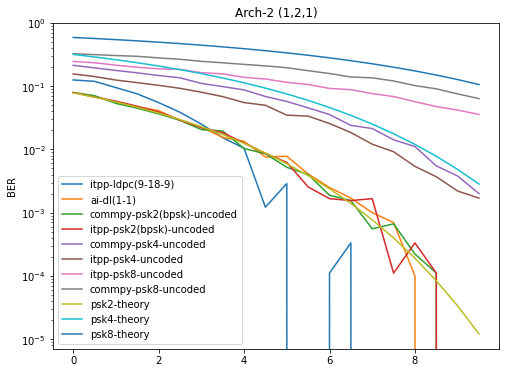

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(1-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

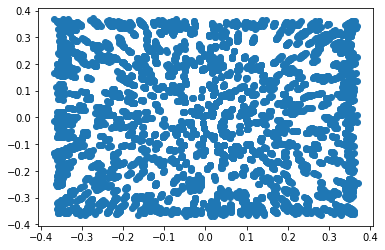

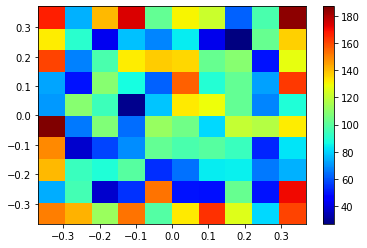

In [89]:
import matplotlib.pyplot as plt
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

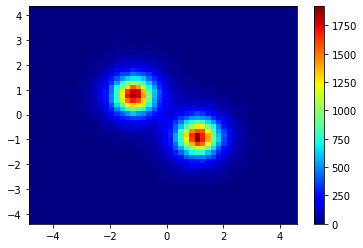

In [90]:
channel_out_array = numpy.transpose(channel_out)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

In [91]:
ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, _  = get_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          test_input_message_one_hot, 
          test_input_message_binary, 
          NUM_OF_INPUT_MESSAGE*2, input_message_length,channel_size)
print (ber_per_iter_dl_tensor)
print (bler_per_iter_dl_tensor)

SNR: 0.000:-> BLER: 0.075 BER: 0.075
SNR: 0.500:-> BLER: 0.067 BER: 0.067
SNR: 1.000:-> BLER: 0.056 BER: 0.056
SNR: 1.500:-> BLER: 0.042 BER: 0.042
SNR: 2.000:-> BLER: 0.042 BER: 0.042
SNR: 2.500:-> BLER: 0.038 BER: 0.038
SNR: 3.000:-> BLER: 0.027 BER: 0.027
SNR: 3.500:-> BLER: 0.017 BER: 0.017
SNR: 4.000:-> BLER: 0.008 BER: 0.008
SNR: 4.500:-> BLER: 0.008 BER: 0.008
SNR: 5.000:-> BLER: 0.005 BER: 0.005
SNR: 5.500:-> BLER: 0.006 BER: 0.006
SNR: 6.000:-> BLER: 0.004 BER: 0.004
SNR: 6.500:-> BLER: 0.001 BER: 0.001
SNR: 7.000:-> BLER: 0.001 BER: 0.001
SNR: 7.500:-> BLER: 0.000 BER: 0.000
SNR: 8.000:-> BLER: 0.000 BER: 0.000
SNR: 8.500:-> BLER: 0.000 BER: 0.000
SNR: 9.000:-> BLER: 0.000 BER: 0.000
SNR: 9.500:-> BLER: 0.000 BER: 0.000
[0.075  0.0665 0.0555 0.042  0.0415 0.038  0.027  0.0165 0.008  0.008
 0.005  0.0065 0.004  0.0005 0.0005 0.     0.     0.     0.     0.    ]
[0.075  0.0665 0.0555 0.042  0.0415 0.038  0.027  0.0165 0.008  0.008
 0.005  0.0065 0.004  0.0005 0.0005 0.     0.   

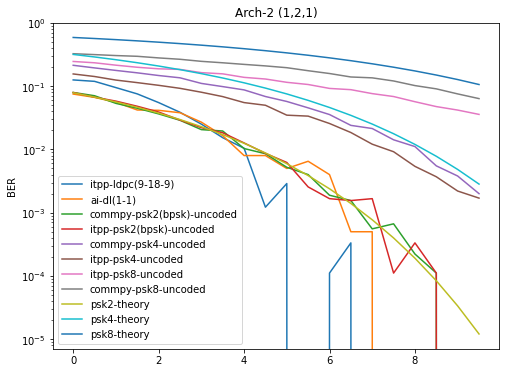

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(1-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

In [93]:

snr_std = 7.0
input_message_length = 10
channel_size = 10

input_message_x = Input(shape=(2**input_message_length,))
# "encoded" is the encoded representation of the input
#enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer2 = Dense(2*channel_size, activation='tanh')(input_message_x)
enc_layer3 =  enc_layer2 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer2)))
encoder = Model(input_message_x, enc_layer3)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
#dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(2**input_message_length, activation="softmax")(encoded_input)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))


print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1024)]       0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 20)           20500       input_13[0][0]                   
__________________________________________________________________________________________________
tf.math.square_6 (TFOpLambda)   (None, 20)           0           dense_12[0][0]                   
__________________________________________________________________________________________________
tf.math.reduce_mean_6 (TFOpLamb ()                   0           tf.math.square_6[0][0]           
___________________________________________________________________________________________

In [94]:
training_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*10))
training_input_message_binary = conv_to_binary_from_decimal (training_input_message,NUM_OF_INPUT_MESSAGE*10,  input_message_length)
training_input_message_one_hot = numpy.zeros((training_input_message.size, 2**input_message_length))
training_input_message_one_hot[numpy.arange(training_input_message.size),training_input_message] = 1
print(training_input_message_one_hot)
print (training_input_message_one_hot.shape)
print (training_input_message.shape)

test_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*2))
test_input_message_binary = conv_to_binary_from_decimal (test_input_message,NUM_OF_INPUT_MESSAGE*2,  input_message_length)
test_input_message_one_hot = numpy.zeros((test_input_message.size, 2**input_message_length))
test_input_message_one_hot[numpy.arange(test_input_message.size),test_input_message] = 1
print(test_input_message_one_hot)
print (test_input_message_one_hot.shape)
print (test_input_message.shape)

training_input_message_label = training_input_message.reshape(training_input_message.shape[1])
print (training_input_message)
print (training_input_message_label)
test_input_message_label = test_input_message.reshape(test_input_message.shape[1])
print (test_input_message)
print (test_input_message_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 1024)
(1, 10000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2000, 1024)
(1, 2000)
[[745 994 224 ... 411 679 535]]
[745 994 224 ... 411 679 535]
[[311 648 531 ... 217  30  47]]
[311 648 531 ... 217  30  47]


In [95]:
import keras
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  autoencoder.fit(training_input_message_one_hot, training_input_message_label,
                epochs=50,#original
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message_one_hot, test_input_message_label))

Training for SNR= 0.0  sigma= 1.0
Epoch 1/50
20/20 [==============================] - 1s 27ms/step - loss: 6.3498 - sparse_categorical_accuracy: 0.2693 - val_loss: 4.9932 - val_sparse_categorical_accuracy: 0.7380
Epoch 2/50
20/20 [==============================] - 0s 20ms/step - loss: 4.5169 - sparse_categorical_accuracy: 0.7344 - val_loss: 3.6263 - val_sparse_categorical_accuracy: 0.7880
Epoch 3/50
20/20 [==============================] - 0s 19ms/step - loss: 3.1960 - sparse_categorical_accuracy: 0.7968 - val_loss: 2.5768 - val_sparse_categorical_accuracy: 0.8345
Epoch 4/50
20/20 [==============================] - 0s 20ms/step - loss: 2.2372 - sparse_categorical_accuracy: 0.8647 - val_loss: 1.8010 - val_sparse_categorical_accuracy: 0.8885
Epoch 5/50
20/20 [==============================] - 1s 44ms/step - loss: 1.5947 - sparse_categorical_accuracy: 0.9209 - val_loss: 1.2389 - val_sparse_categorical_accuracy: 0.9325
Epoch 6/50
20/20 [==============================] - 0s 19ms/step - loss

In [96]:
ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out  = get_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          training_input_message_one_hot, 
          training_input_message_binary [0:NUM_OF_INPUT_MESSAGE*10], 
          NUM_OF_INPUT_MESSAGE*10, input_message_length,channel_size)
print (ber_per_iter_dl_tensor)
print (bler_per_iter_dl_tensor)

SNR: 0.000:-> BLER: 0.413 BER: 0.207
SNR: 0.500:-> BLER: 0.354 BER: 0.176
SNR: 1.000:-> BLER: 0.287 BER: 0.145
SNR: 1.500:-> BLER: 0.241 BER: 0.120
SNR: 2.000:-> BLER: 0.181 BER: 0.091
SNR: 2.500:-> BLER: 0.139 BER: 0.070
SNR: 3.000:-> BLER: 0.098 BER: 0.049
SNR: 3.500:-> BLER: 0.066 BER: 0.033
SNR: 4.000:-> BLER: 0.045 BER: 0.022
SNR: 4.500:-> BLER: 0.028 BER: 0.014
SNR: 5.000:-> BLER: 0.016 BER: 0.008
SNR: 5.500:-> BLER: 0.008 BER: 0.004
SNR: 6.000:-> BLER: 0.004 BER: 0.002
SNR: 6.500:-> BLER: 0.002 BER: 0.001
SNR: 7.000:-> BLER: 0.001 BER: 0.001
SNR: 7.500:-> BLER: 0.001 BER: 0.000
SNR: 8.000:-> BLER: 0.000 BER: 0.000
SNR: 8.500:-> BLER: 0.000 BER: 0.000
SNR: 9.000:-> BLER: 0.000 BER: 0.000
SNR: 9.500:-> BLER: 0.000 BER: 0.000
[2.0672e-01 1.7599e-01 1.4513e-01 1.2026e-01 9.0600e-02 6.9550e-02
 4.9030e-02 3.3000e-02 2.2160e-02 1.4010e-02 8.0200e-03 4.1800e-03
 2.1000e-03 9.4000e-04 6.2000e-04 3.2000e-04 3.0000e-05 0.0000e+00
 5.0000e-05 0.0000e+00]
[4.129e-01 3.545e-01 2.875e-01 2.41

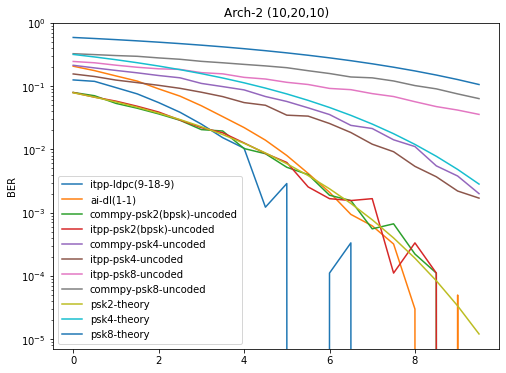

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(1-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

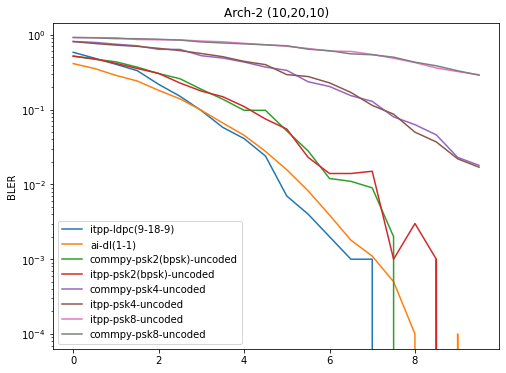

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor,'', label="ai-dl(1-1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

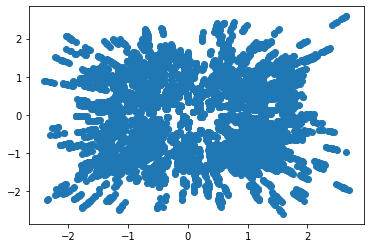

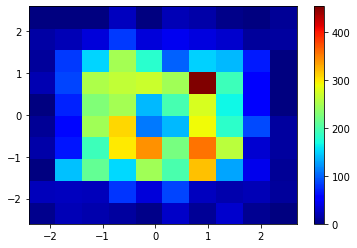

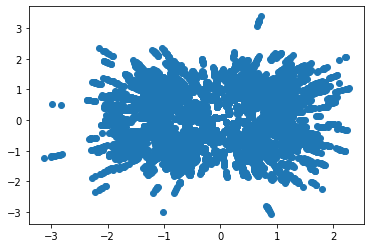

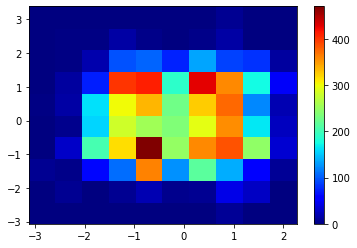

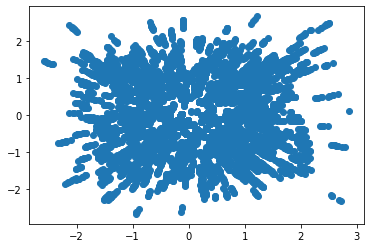

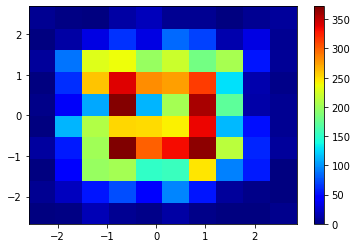

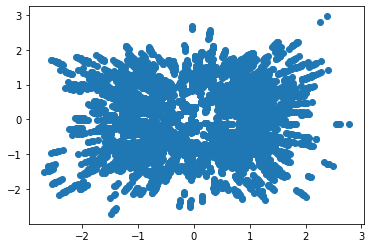

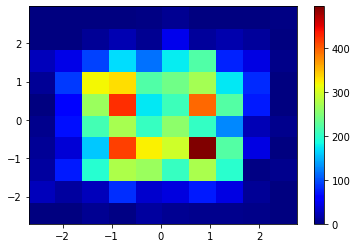

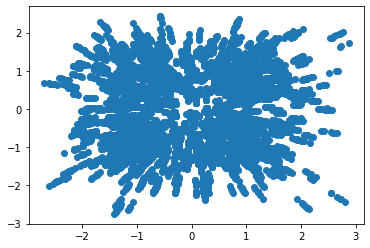

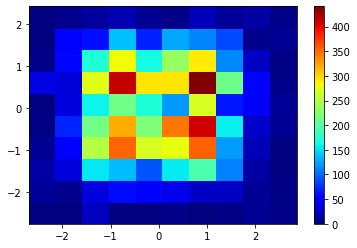

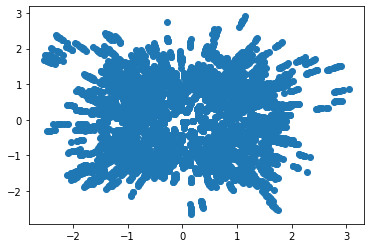

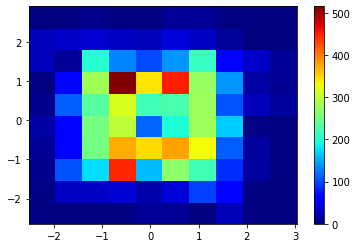

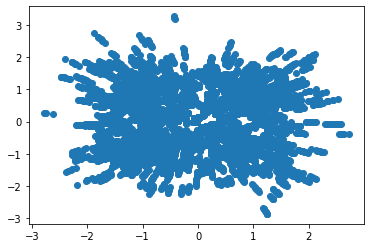

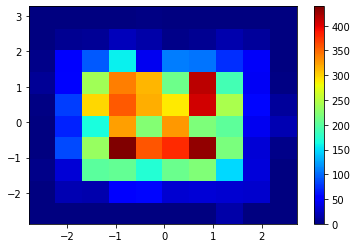

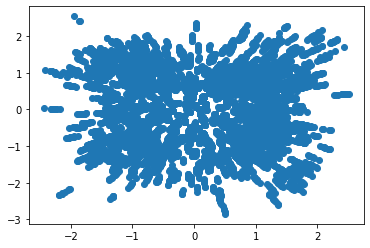

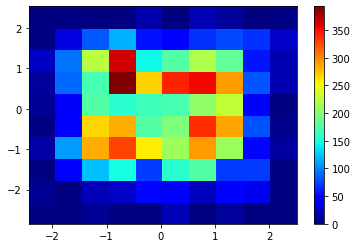

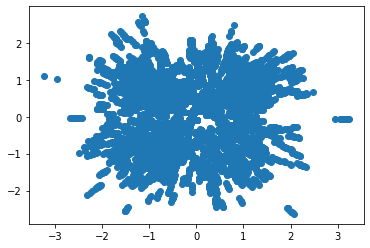

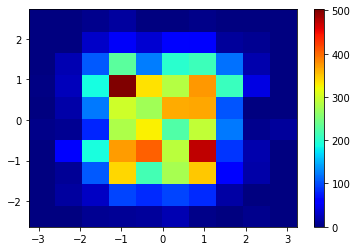

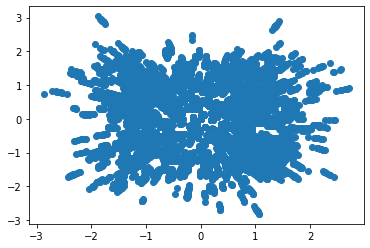

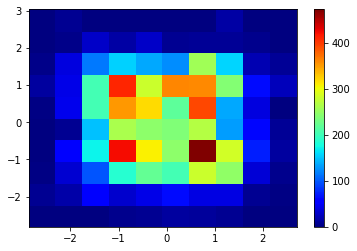

In [102]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message_one_hot)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

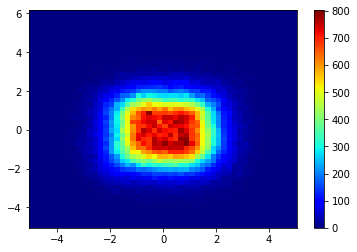

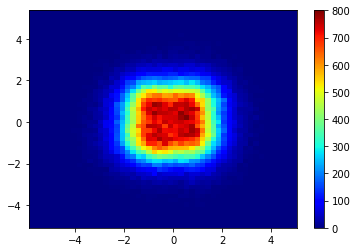

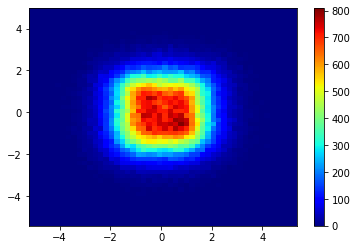

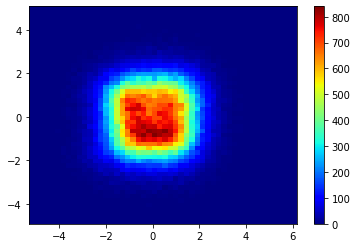

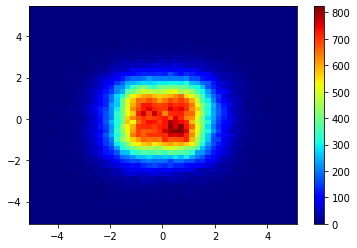

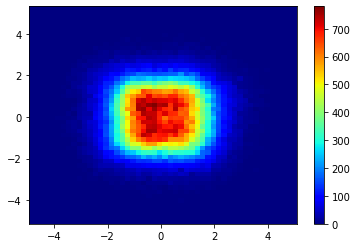

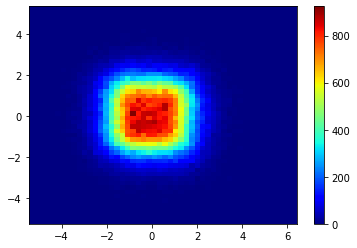

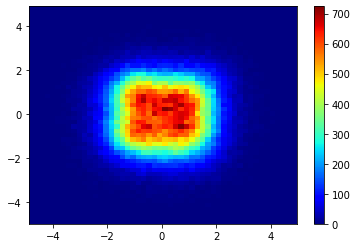

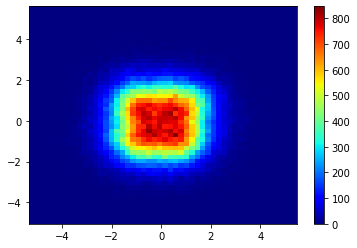

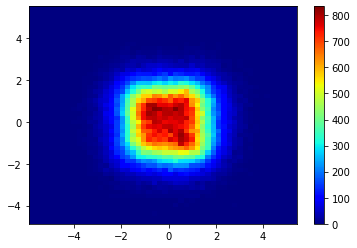

In [103]:
channel_out_array = numpy.transpose(channel_out)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

In [104]:
snr_std = 7.0
input_message_length = 10
channel_size = 10

input_message_x = Input(shape=(2**input_message_length,))
# "encoded" is the encoded representation of the input
#enc_layer1 = Dense(encoder_output_length, activation='tanh')(input_message_x)
enc_layer2 = Dense(2*channel_size, activation='tanh')(input_message_x)

#enc_layer3 =  enc_layer2 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer2)))

x = tf.sqrt(tf.reduce_sum(tf.square(enc_layer2), axis=1))
x = tf.reshape (x, (-1,1))
enc_layer3 = enc_layer2 / x 


encoder = Model(input_message_x, enc_layer3)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
#dec_layer1 = Dense(encoder_output_length, activation='tanh')(encoded_input)
dec_layer2 = Dense(2**input_message_length, activation="softmax")(encoded_input)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))


print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 1024)]       0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 20)           20500       input_15[0][0]                   
__________________________________________________________________________________________________
tf.math.square_7 (TFOpLambda)   (None, 20)           0           dense_14[0][0]                   
__________________________________________________________________________________________________
tf.math.reduce_sum (TFOpLambda) (None,)              0           tf.math.square_7[0][0]           
___________________________________________________________________________________________

In [105]:
training_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*10))
training_input_message_binary = conv_to_binary_from_decimal (training_input_message,NUM_OF_INPUT_MESSAGE*10,  input_message_length)
training_input_message_one_hot = numpy.zeros((training_input_message.size, 2**input_message_length))
training_input_message_one_hot[numpy.arange(training_input_message.size),training_input_message] = 1
print(training_input_message_one_hot)
print (training_input_message_one_hot.shape)
print (training_input_message.shape)

test_input_message = numpy.random.randint(2**input_message_length, size=(1,NUM_OF_INPUT_MESSAGE*2))
test_input_message_binary = conv_to_binary_from_decimal (test_input_message,NUM_OF_INPUT_MESSAGE*2,  input_message_length)
test_input_message_one_hot = numpy.zeros((test_input_message.size, 2**input_message_length))
test_input_message_one_hot[numpy.arange(test_input_message.size),test_input_message] = 1
print(test_input_message_one_hot)
print (test_input_message_one_hot.shape)
print (test_input_message.shape)

training_input_message_label = training_input_message.reshape(training_input_message.shape[1])
print (training_input_message)
print (training_input_message_label)
test_input_message_label = test_input_message.reshape(test_input_message.shape[1])
print (test_input_message)
print (test_input_message_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 1024)
(1, 10000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2000, 1024)
(1, 2000)
[[394 448 731 ... 470  59 991]]
[394 448 731 ... 470  59 991]
[[  56 1018  882 ...   35  183  847]]
[  56 1018  882 ...   35  183  847]


In [106]:
import keras
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
  autoencoder.fit(training_input_message_one_hot, training_input_message_label,
                epochs=50,#original
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message_one_hot, test_input_message_label))

Training for SNR= 0.0  sigma= 1.0
Epoch 1/50
20/20 [==============================] - 1s 30ms/step - loss: 6.8371 - sparse_categorical_accuracy: 0.0206 - val_loss: 6.5939 - val_sparse_categorical_accuracy: 0.5580
Epoch 2/50
20/20 [==============================] - 0s 20ms/step - loss: 6.5069 - sparse_categorical_accuracy: 0.0781 - val_loss: 6.3604 - val_sparse_categorical_accuracy: 0.6195
Epoch 3/50
20/20 [==============================] - 0s 19ms/step - loss: 6.2863 - sparse_categorical_accuracy: 0.0847 - val_loss: 6.1515 - val_sparse_categorical_accuracy: 0.6235
Epoch 4/50
20/20 [==============================] - 0s 20ms/step - loss: 6.0963 - sparse_categorical_accuracy: 0.0831 - val_loss: 5.9591 - val_sparse_categorical_accuracy: 0.6290
Epoch 5/50
20/20 [==============================] - 0s 19ms/step - loss: 5.9407 - sparse_categorical_accuracy: 0.0848 - val_loss: 5.7831 - val_sparse_categorical_accuracy: 0.6430
Epoch 6/50
20/20 [==============================] - 0s 20ms/step - loss

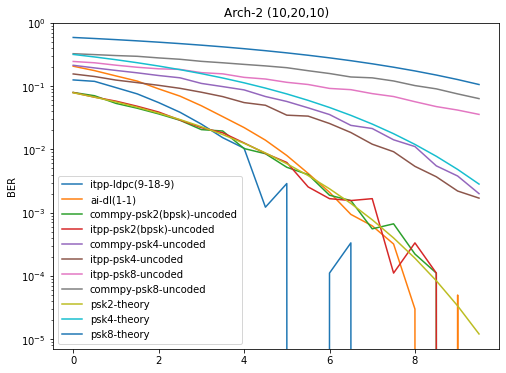

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(1-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

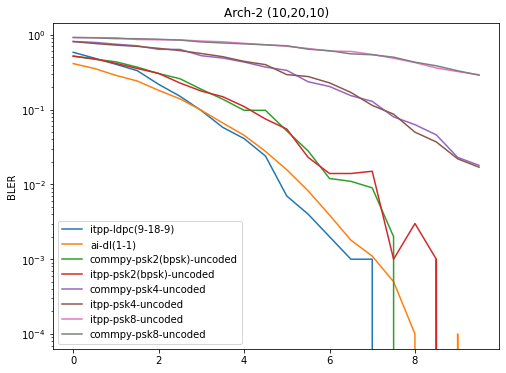

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor,'', label="ai-dl(1-1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

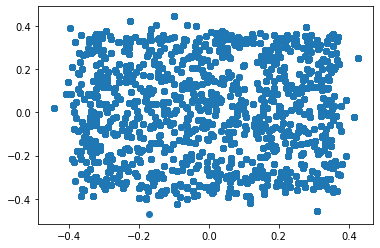

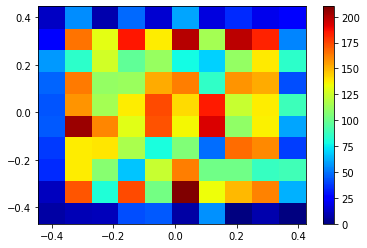

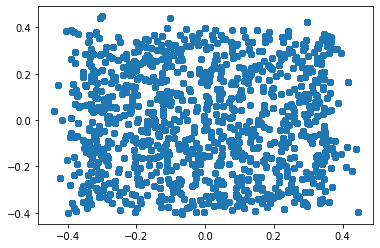

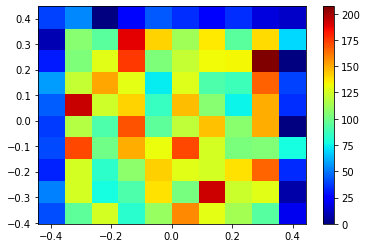

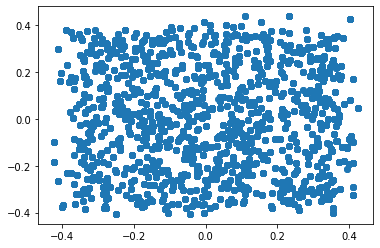

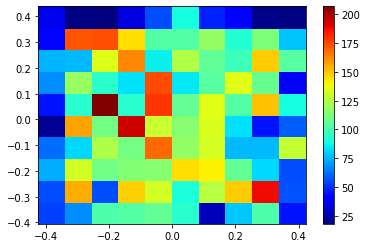

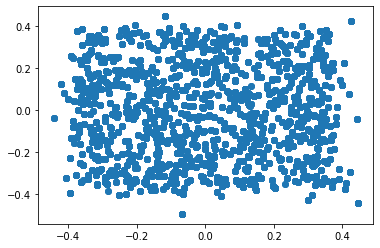

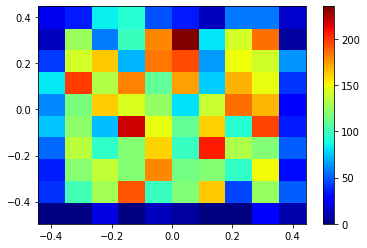

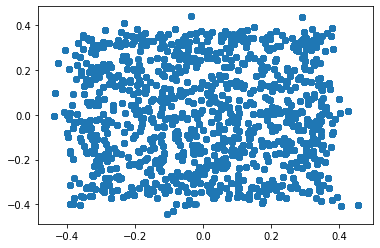

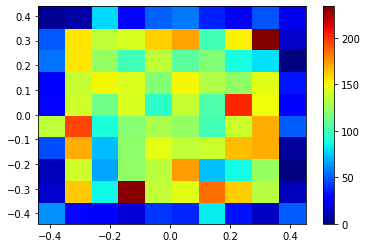

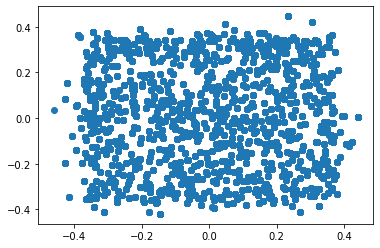

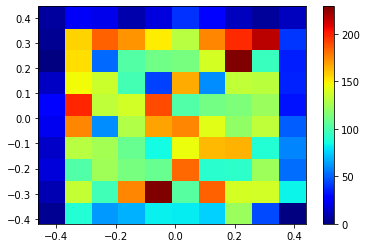

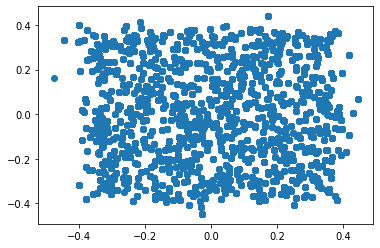

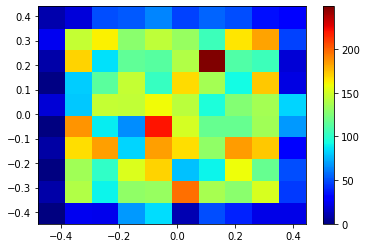

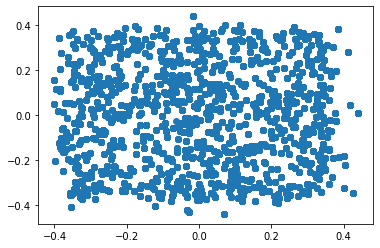

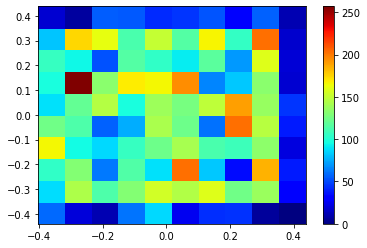

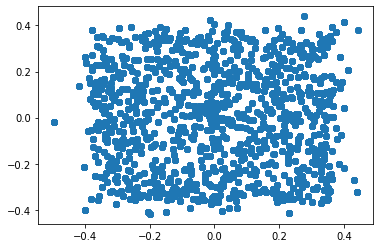

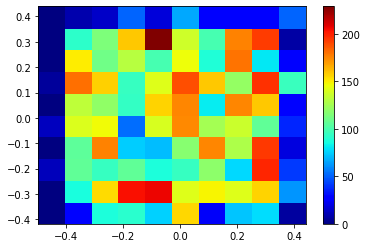

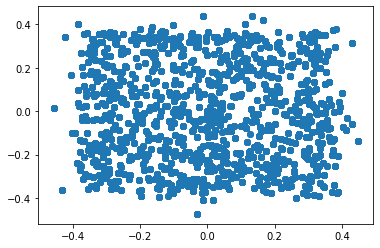

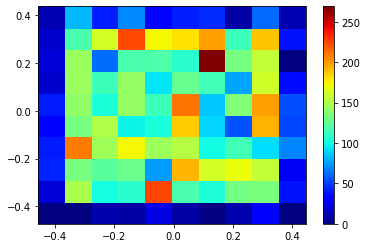

In [114]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message_one_hot)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

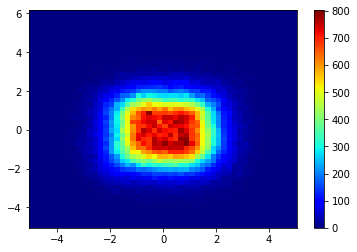

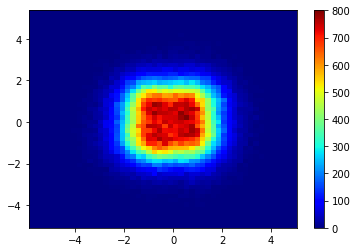

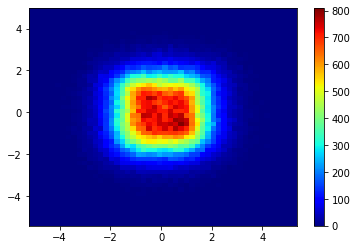

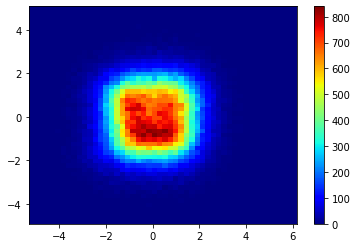

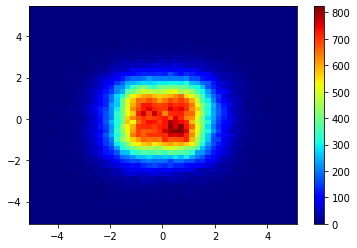

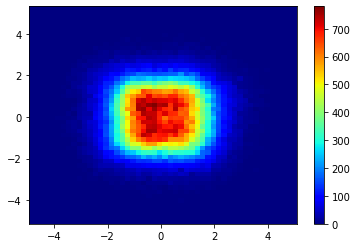

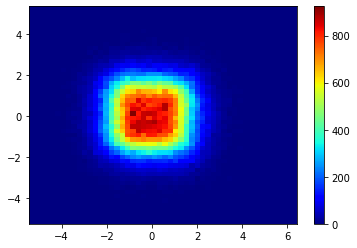

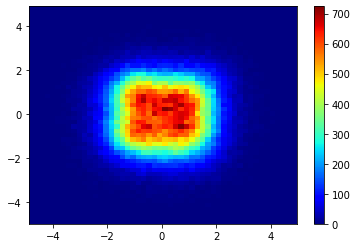

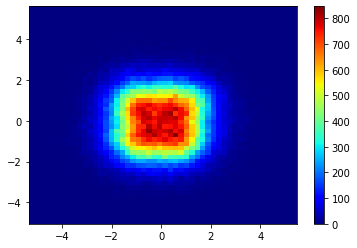

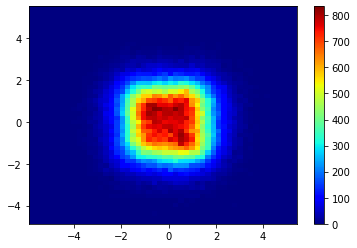

In [110]:
channel_out_array = numpy.transpose(channel_out)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

In [126]:
print (encoded_message.shape)
cnt = 0
for j in range(0, NUM_OF_INPUT_MESSAGE*10):
  for i in range(0, input_message_length):
    dist = numpy.sqrt(numpy.square(encoded_message[j][i*2] - encoded_message[j][i*2+1]))
    if (dist < 0.2):
        cnt = cnt + 1
print (cnt/(NUM_OF_INPUT_MESSAGE*10))

(10000, 20)
4.4061
